In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [31]:
def convert_to_bw(filepath):
    img = cv2.imread(filepath)
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh, bwImg = cv2.threshold(grayImg, 127, 255, cv2.THRESH_BINARY)
    return bwImg

In [32]:
def showImage(img):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#     plt.xticks(np.arange(0, 8000, 1000)) 
#     plt.yticks(np.arange(0, 5000, 1000))
    plt.show()

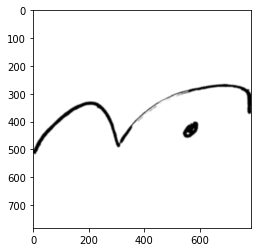

In [35]:
img = convert_to_bw("a36.jpg")
showImage(img)

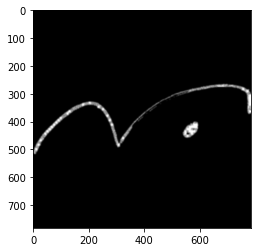

In [36]:
img2 = np.where(img==0, 255, 0)
showImage(img2)

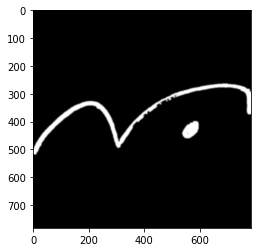

In [43]:
kernel = np.ones((5,5),np.uint8)
img3 = cv2.dilate(img2.astype('uint8'), kernel, iterations=1)
showImage(img3)

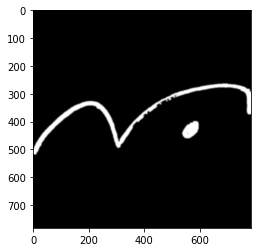

In [45]:
opening = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel)
showImage(opening)

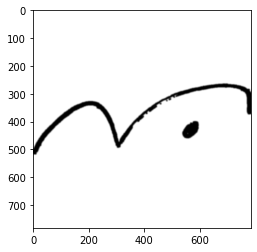

In [48]:
img4 = np.where(opening==255, 0, 255)
showImage(img4)

In [53]:
a = [[1, 2, 3, 4, 90.2, 60.1, 70.78], [2, 5, 1, 2, 40.2, 30.1, 10.78], [3, 8, 1, 5, 56.2, 61.1, 40.78]]
b = [row for row in a if row[4] > 60.0 or row[5] > 60 or row[6] > 60]
b

[[1, 2, 3, 4, 90.2, 60.1, 70.78], [3, 8, 1, 5, 56.2, 61.1, 40.78]]

In [4]:
def croppingImage(img, filename, label):
    img2 = np.where(img==0, 255, 0)
    kernel = np.ones((5,5),np.uint8)
#     erosion = cv2.erode(img2.astype('uint8'),kernel,iterations = 1)
    img3 = cv2.morphologyEx(img2.astype('uint8'), cv2.MORPH_OPEN, kernel)
    
    #axis=0 refer to column, axis=1 refer to row
    
    #find column with value >0 to find left/right border
    img2_col = np.sum(img3, axis = 0)
    col_with_value = np.where(img2_col > 0)[0]
    
    #find row with value >0 to find top/bottom border
    img2_row = np.sum(img3, axis = 1)
    row_with_value = np.where(img2_row > 0)[0]
    
    #get left/right border
    start_col = min(col_with_value)
    end_col = max(col_with_value)
#     print('start col', start_col)
#     print('end col', end_col)
    
    #get top/bottom border
    start_row = min(row_with_value)
    end_row = max(row_with_value)
#     print('start row', start_row)
#     print('end row', end_row)
    
    #get ROI width & height
    roi_width = end_col - start_col
    roi_height = end_row - start_row
    
    #get ROI area
    img4 = img[start_row:end_row, start_col:end_col]
    out_img = cv2.imwrite('datasets_600dpi/'+label+'/'+filename, img4)

In [5]:
img_dir = "../Datasets_Mbojo"

In [6]:
for subdir1 in os.listdir(img_dir):
    subdir2 = img_dir+'/'+subdir1
    for file in os.listdir(subdir2):
        file_path = subdir2+'/'+file
        croppingImage(convert_to_bw(file_path), file, subdir1)

KeyboardInterrupt: 

In [ ]:
# img = cv2.imread('img0462.tif')
# img2 = convert_to_bw(img)
# showImage(img2)

In [ ]:
# croppingImage(img2)